In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.3

In [2]:
CRANK_RADIUS = 0.1

MARP_BLUE = WHITE #rgb_to_color(hex_to_rgb("#77C8F6"))

OFFSET = np.array([-5, -2, 0])

TRANSFORM_COLOR = YELLOW_B

grid_dots = []
for x in range(-7, 8):
    for y in range(-4, 5):
        grid_dots.append(Dot(np.array([x, y, 0]), color=DARKER_GREY))
grid = Group(*grid_dots)

note_labels = {-2 : "A", -1 : "B", 0 : "C", 1  : "D", 2 : "E", 3 : "F", 4 : "G", 5 : "A", 6: "B"}

midi_ax = Axes(
            x_range=[-2, 12, 1],
            y_range=[-2, 6, 1],
            x_length=14,
            y_length=8,
            tips=False,
            x_axis_config={"include_numbers": True},
            y_axis_config={"label_direction": 1.5*UP + LEFT}
        )

midi_ax.get_y_axis().add_labels(note_labels)

#### Cranks

def create_crank(start, end, color = TRANSFORM_COLOR, crank_radius = CRANK_RADIUS) :
    crank_dot = Dot(start, color = color)

    crank_len = np.linalg.norm(end - start)
    crank_line = Line(start, start + (end - start) * (crank_len - crank_radius) / crank_len)
    crank_line.color = color

    crank_arc = Arc(arc_center=end , angle=PI*5/4, start_angle= crank_line.get_angle()+ 3*PI/8, radius=crank_radius)
    crank_arc.color = color
    return VGroup(* [crank_dot,crank_line,crank_arc])


def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def change_crank(crank, start, end) :
    old_vect = crank[1].get_vector()
    crank[0].move_to(start)
    crank_len = np.linalg.norm(end - start)
    crank[1].put_start_and_end_on(
        start,
        start + (end - start) * (crank_len - CRANK_RADIUS) / crank_len
    )
    new_vect = crank[1].get_vector()
    angle_diff = angle_between(old_vect,new_vect)
    crank[2].move_arc_center_to(end)
    crank[2].rotate(-angle_diff, about_point = end)


##### Cursors

def create_cursor(origin, color = TRANSFORM_COLOR):
    cursor_origin = Dot(origin, color = color)
    cursor_horizontal = Line(
        7 * LEFT + origin[1] * UP,
        7 * RIGHT + origin[1] * UP
    )
    cursor_horizontal.color = color
    cursor_vertical = Line(
        4 * DOWN + origin[0] * RIGHT,
        4 * UP + origin[0] * RIGHT
    )
    cursor_vertical.color = color
    return VGroup(*[cursor_origin,cursor_horizontal,cursor_vertical])

def shift_cursor(cursor, shifter) :
    cursor[0].move_to(cursor[0].get_center() + shifter)
    cursor[1].put_start_and_end_on(
        cursor[1].start + UP * shifter[1],
        cursor[1].end + UP * shifter[1],
    )
    cursor[2].put_start_and_end_on(
        cursor[2].start + RIGHT * shifter[0],
        cursor[2].end + RIGHT * shifter[0],
    )



In [3]:
%%manim -qm DoReMiTile

SIZE_SQUARE = 0.9

square1 = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)

square1 = VGroup(square1)
square2 = square1.copy()
square2.shift(UR)
square3 = square2.copy()
square3.shift(UR)
square4 = square3.copy()
square4.shift(RIGHT * 2)
square5 = square4.copy()
square5.shift(RIGHT)
square6 = square5.copy()
square6.shift(RIGHT)

doremi_notes = VGroup(*[square1, square2, square3])

doremi_notes.stretch_to_fit_width(width = doremi_notes.width/3)

crank1 = create_crank(square1.get_corner(DL), square1.get_corner(UR))
crank2 = create_crank(square2.get_corner(DL), square2.get_corner(UR))
doremi_cranks = VGroup(*[crank1, crank2])

bg_doremi = BackgroundRectangle(
  doremi_notes,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

doremi = VGroup(*[doremi_notes,bg_doremi,doremi_cranks])
doremi.shift(LEFT)

laperdrix_notes = VGroup(*[square4,square5, square6])
laperdrix_notes.stretch_to_fit_width(width = laperdrix_notes.width/3)

crank1 = create_crank(square4.get_corner(DL), square4.get_corner(DR))
crank2 = create_crank(square5.get_corner(DL), square5.get_corner(DR))
laperdrix_cranks = VGroup(*[crank1, crank2])
laperdrix_cranks.shift(UP/2)

bg_laperdrix = BackgroundRectangle(
  laperdrix_notes,
  color=PURPLE_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

laperdrix = VGroup(*[laperdrix_notes,bg_laperdrix, laperdrix_cranks])
laperdrix.shift(11/3*LEFT)

mifasol = doremi.copy()
mifasol.shift(8/3*RIGHT + 2 * UP)

senvole = laperdrix.copy()
senvole.shift(8/3*RIGHT + 2 * UP)

fa = Square(
  side_length = SIZE_SQUARE,
  color = WHITE,
  fill_opacity = 0.5)
fa.shift(UR/2)

mi = fa.copy()
mi.shift(DR)

re = mi.copy()
re.shift(DR)



famire_notes = VGroup(*[fa,mi,re])
famire_notes.stretch_to_fit_width(width = famire_notes.width/3)

crank1 = create_crank(fa.get_corner(UL), fa.get_corner(DR))
crank2 = create_crank(mi.get_corner(UL), mi.get_corner(DR))
famire_cranks = VGroup(*[crank1, crank2])




bg_famire = BackgroundRectangle(
  famire_notes,
  color= BLUE_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

famire = VGroup(*[famire_notes, bg_famire,famire_cranks])
famire.shift(UP + 2/3 * LEFT)
famire[1].color = BLUE_C

dansunpres = senvole.copy()
dansunpres.shift(8/3*RIGHT + 3*DOWN)


miredo = famire.copy()
miredo.shift(8/3*RIGHT + DOWN)

tombeeau = dansunpres.copy()
tombeeau.shift(8/3*RIGHT + DOWN)

full_doremi = VGroup(*[doremi,laperdrix,mifasol,senvole,famire,dansunpres,miredo,tombeeau])


all_cranks = VGroup(*[full_doremi[i][2] for i in range(len(full_doremi))])



func_niveau1 = Tex(
        "$(0,C) \mapsto$", " DoReMi",'''

''',"$(4,E) \mapsto$", " DoDoDo",'''

''',"$(8,E) \mapsto$", " DoReMi",'''

''',"$(12,G) \mapsto$", " DoDoDo",'''

''',"$(16,F) \mapsto$", " DoSiLa",'''

''',"$(20,D) \mapsto$", " DoDoDo",'''

''',"$(24,E) \mapsto$", " DoSiLa",'''

''',"$(24,C) \mapsto$", " DoDoDo",
    )
func_niveau1[1].color = func_niveau1[7].color = RED_C
func_niveau1[13].color = func_niveau1[19].color = BLUE_C
func_niveau1[4].color = func_niveau1[10].color = \
func_niveau1[16].color = func_niveau1[22].color = PURPLE_C

func_niveau1.move_to(RIGHT * 5.5 + UP)
func_niveau1.width = 1.9

class DoReMiTile(Scene) :
  def construct(self) :
    self.add(midi_ax)
    comment = Tex('''Leveling up in pattern's hierarchy

    Level 1''').to_edge(UR)
    comment.height = 0.7

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    background_doremi= BackgroundRectangle(doremi, fill_opacity = 1.0)
    self.add(background_doremi)
    self.add(doremi)

    full_doremi.generate_target()
    for i in range(len(full_doremi)) :
      full_doremi.target[i][1].set_fill(opacity = 1.0)
      full_doremi.target[i][2].color = rgba_to_color([0.,0.,0.,0.])

    self.add(full_doremi)

    #self.play()
    self.play(
      MoveToTarget(full_doremi),
      FadeIn(func_niveau1),
      #FadeOut(all_cranks),

      run_time = 2.0
    )

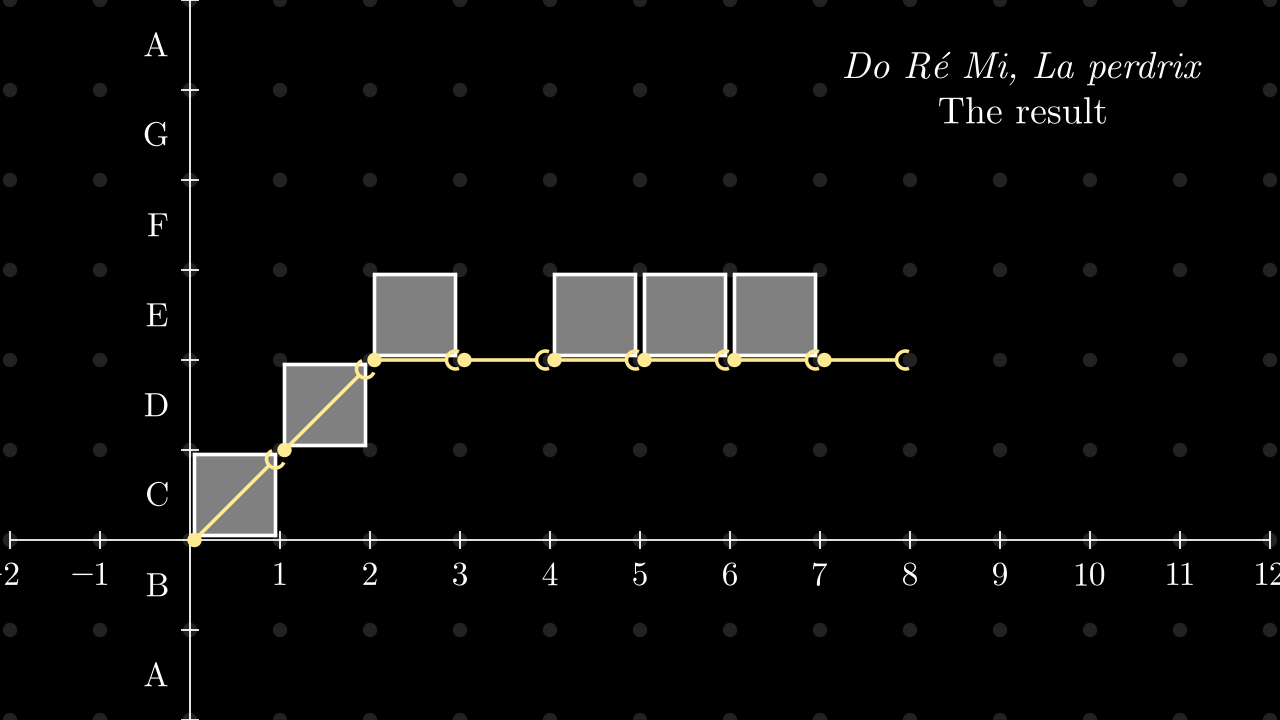

In [4]:
%%manim -qm DoReMiTuile0

class DoReMiTuile0(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)
    comment = Tex('''\emph{Do Ré Mi, La perdrix}

The result''').to_edge(UR)
    comment.height = 0.7

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    square1 = Square(
      side_length = SIZE_SQUARE,
      color = WHITE,
      fill_opacity = 0.5)
    square1.move_to(UR/2 + OFFSET)

    square2 = square1.copy()
    square2.shift(UR)

    square3 = square2.copy()
    square3.shift(UR)

    doremi_notes = VGroup(*[square1,square2, square3])
    bg_doremi = BackgroundRectangle(
      doremi_notes,
      color=RED_B,
      fill_opacity = 0.,
      stroke_width = 3,
      stroke_opacity = 1.)

    doremi = VGroup(*[doremi_notes,bg_doremi])

    self.add(doremi_notes)

    square4 = square3.copy()
    square4.shift(RIGHT * 2)

    square5 = square4.copy()
    square5.shift(RIGHT)

    square6 = square5.copy()
    square6.shift(RIGHT)

    laperdrix_notes = VGroup(*[square4,square5, square6])



    self.add(laperdrix_notes)

    cranks_l = [
        create_crank(square1.get_corner(DL), square1.get_corner(UR)),
        create_crank(square2.get_corner(DL), square2.get_corner(UR)),
        create_crank(square3.get_corner(DL), square3.get_corner(DR)),
        create_crank(square3.get_corner(DR) + 0.1 * RIGHT, square4.get_corner(DL) + 0.1 * LEFT),
        create_crank(square4.get_corner(DL), square4.get_corner(DR)),
        create_crank(square5.get_corner(DL), square5.get_corner(DR)),
        create_crank(square6.get_corner(DL), square6.get_corner(DR)),
        create_crank(square6.get_corner(DR)+  0.1 * RIGHT, square6.get_corner(DR) + RIGHT),
      ]

    cranks = VGroup(*cranks_l)
    cranks.shift(0.05 * DOWN)
    self.add(cranks)


In [5]:
%%manim -qm DoReMiTuile1

square1 = Square(
      side_length = SIZE_SQUARE,
      color = WHITE,
      fill_opacity = 0.5)
square1.move_to(UR/2 + OFFSET)

square2 = square1.copy()
square2.shift(UR)

square3 = square2.copy()
square3.shift(UR)

doremi_notes = VGroup(*[square1,square2, square3])
bg_doremi = BackgroundRectangle(
  doremi_notes,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

doremi = VGroup(*[doremi_notes,bg_doremi])

square4 = square3.copy()
square4.shift(RIGHT * 2)

square5 = square4.copy()
square5.shift(RIGHT)

square6 = square5.copy()
square6.shift(RIGHT)

laperdrix_notes = VGroup(*[square4,square5, square6])


cranks_doremi = VGroup(*[
    create_crank(square1.get_corner(DL), square1.get_corner(UR)),
    create_crank(square2.get_corner(DL), square2.get_corner(UR)),
    create_crank(square3.get_corner(DL), square3.get_corner(DR)),
    create_crank(square3.get_corner(DR) + 0.1 * RIGHT, square4.get_corner(DL) + 0.1 * LEFT),
])
cranks_laperdrix = VGroup(*[
    create_crank(square4.get_corner(DL), square4.get_corner(DR)),
    create_crank(square5.get_corner(DL), square5.get_corner(DR)),
    create_crank(square6.get_corner(DL), square6.get_corner(DR)),
    create_crank(square6.get_corner(DR), square6.get_corner(DR) + RIGHT),
])

#cranks_doremi.shift(0.05 * DOWN)
#cranks_laperdrix.shift(0.05 * DOWN)

doremi = VGroup(*[doremi_notes, cranks_doremi])
laperdrix = VGroup(*[laperdrix_notes, cranks_laperdrix])


bg_laperdrix = BackgroundRectangle(
  laperdrix,
  color=YELLOW_C,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

bg_doremi = BackgroundRectangle(
  doremi,
  color=RED_B,
  fill_opacity = 0.,
  stroke_width = 3,
  stroke_opacity = 1.)

bgs = VGroup(*[bg_doremi,bg_laperdrix])


class DoReMiTuile1(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)
    comment = Tex('''Tile hierarchisation''').to_edge(UR)
    comment.height = 0.3

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)
    self.add(doremi,laperdrix)


    self.play(FadeIn(bgs),run_time = 0.5)


    bgs.generate_target()
    for bg in bgs.target :
      bg.set_fill(opacity = 0.2)

    self.play(
      MoveToTarget(bgs),
      FadeOut(doremi),
      FadeOut(laperdrix)
    )

    big_cranks = VGroup(*[
      create_crank(bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL),
      create_crank(bgs[1].get_corner(DL), bgs[1].get_corner(DR))
    ])

    self.remove(doremi)
    self.remove(laperdrix)

    self.play(FadeIn(big_cranks))

    #self.add(doremi)
    #self.add(laperdrix)

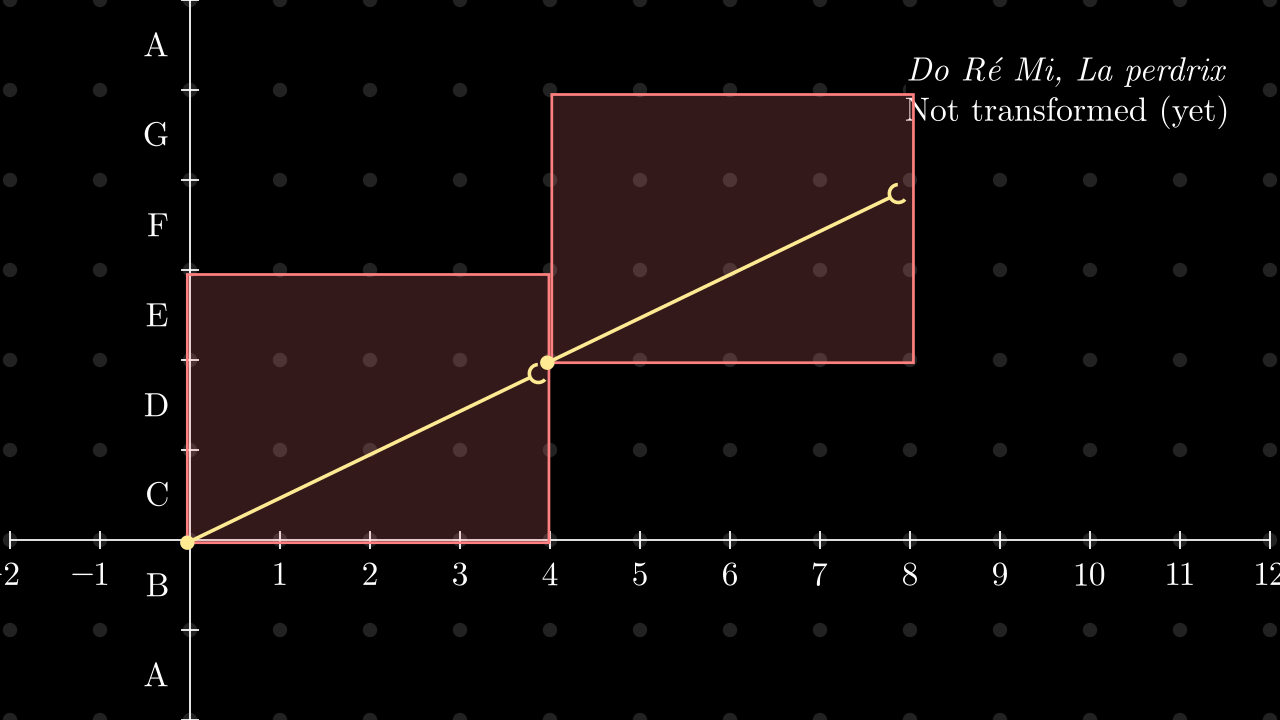

In [6]:
%%manim -qm DoReMiTransfoLegacy

class DoReMiTransfoLegacy(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''\emph{Do Ré Mi, La perdrix}

Not transformed (yet)''').to_edge(UR)
    comment.height = 0.8

    comment.shift(0.5 * RIGHT)

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)




    bgs_nontrans = VGroup(*[bgs[0],bgs[0].copy()])

    bgs_nontrans[1].shift(4.05 * RIGHT + 2 * UP )

    crank = create_crank(
      bgs[0].get_corner(DL), bgs[1].get_corner(DL) + 0.1 * DL)

    big_cranks = VGroup(*[
      crank ,
      crank.copy()
    ])

    big_cranks[1].shift(4 * RIGHT + 2 * UP)

    self.add(bgs_nontrans,big_cranks)
    #self.add(doremi)
    #self.add(laperdrix)

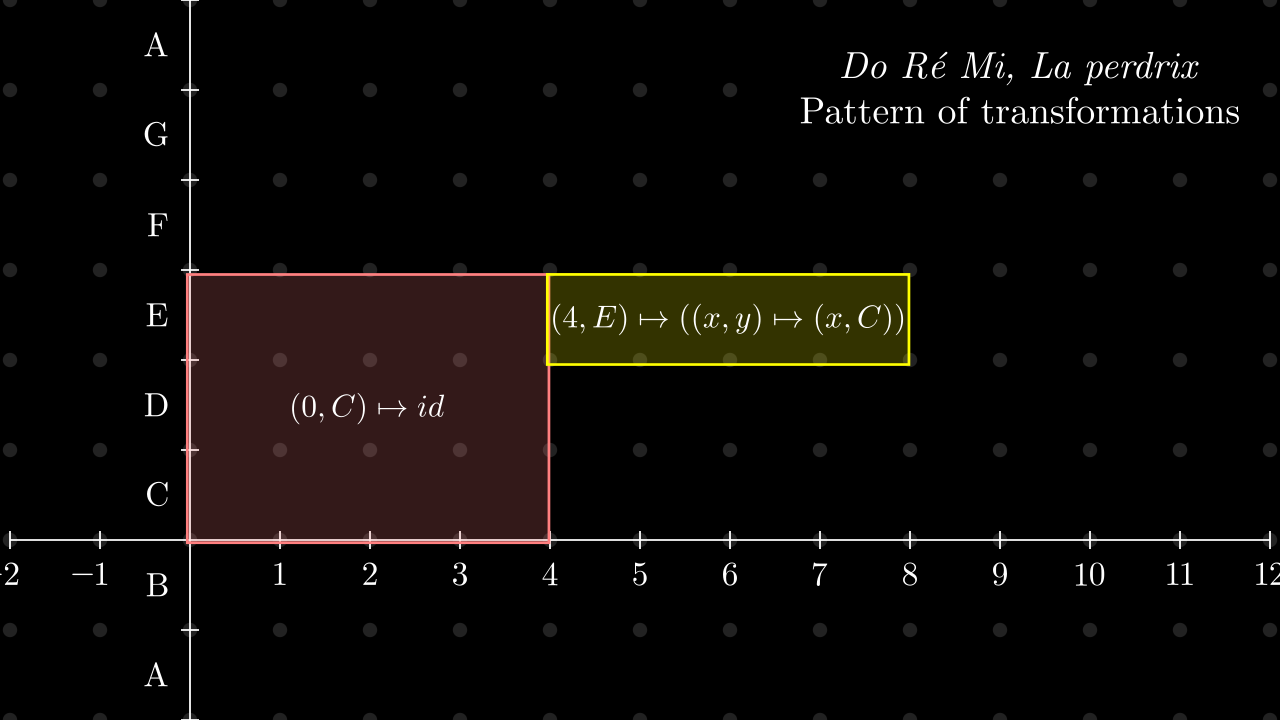

In [7]:
%%manim -qm DoReMiTransfo2

class DoReMiTransfo2(Scene) :
  def construct(self) :
    self.add(grid)
    self.add(midi_ax)

    comment = Tex('''\emph{Do Ré Mi, La perdrix}

Pattern of transformations''').to_edge(UR)
    comment.height = 0.8

    comment.shift(0.5 * RIGHT)

    background_comment = BackgroundRectangle(comment, fill_opacity = 1.0)
    self.add(background_comment)
    self.add(comment)

    transfos = MathTex(
      "(0,C) \mapsto id",
      "(4,E) \mapsto ( (x,y) \mapsto (x,C) )")

    for i in range(len(transfos)) :
      transfos[i].move_to(bgs[i].get_center())
      transfos[i].height = 0.35



    self.add(bgs)
    self.add(transfos)
    #self.add(doremi)
    #self.add(laperdrix)